<a href="https://colab.research.google.com/github/LeticiaGDornelas/Projetos_DNC/blob/main/Desafio7_LeticiaGDornelas_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio 7: Crie um modelo de análise das métricas RFM**

**Contexto:** Você foi contratado por uma empresa de e-commerce que está buscando entender melhor o comportamento de seus clientes para personalizar as suas campanhas de marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e 2011.

Com base nesses dados, você precisa agrupar os clientes em clusters com base em seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:

Clientes que compram os mesmos produtos;
Clientes que possuem a mesma frequência de compras;
Clientes que gastam mais dinheiro em suas compras.

A partir desses clusters, gere insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras

# **Etapa 01: Análise Exploratória dos Dados**

e

# **Etapa 02: Pré-processamento dos dados**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregando a base de dados
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

In [ ]:
# Descrição estatística dos dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Convertendo a coluna 'CustomerID' de float para string
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
# Convertendo a coluna 'InvoiceDate' de object para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [ ]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [ ]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

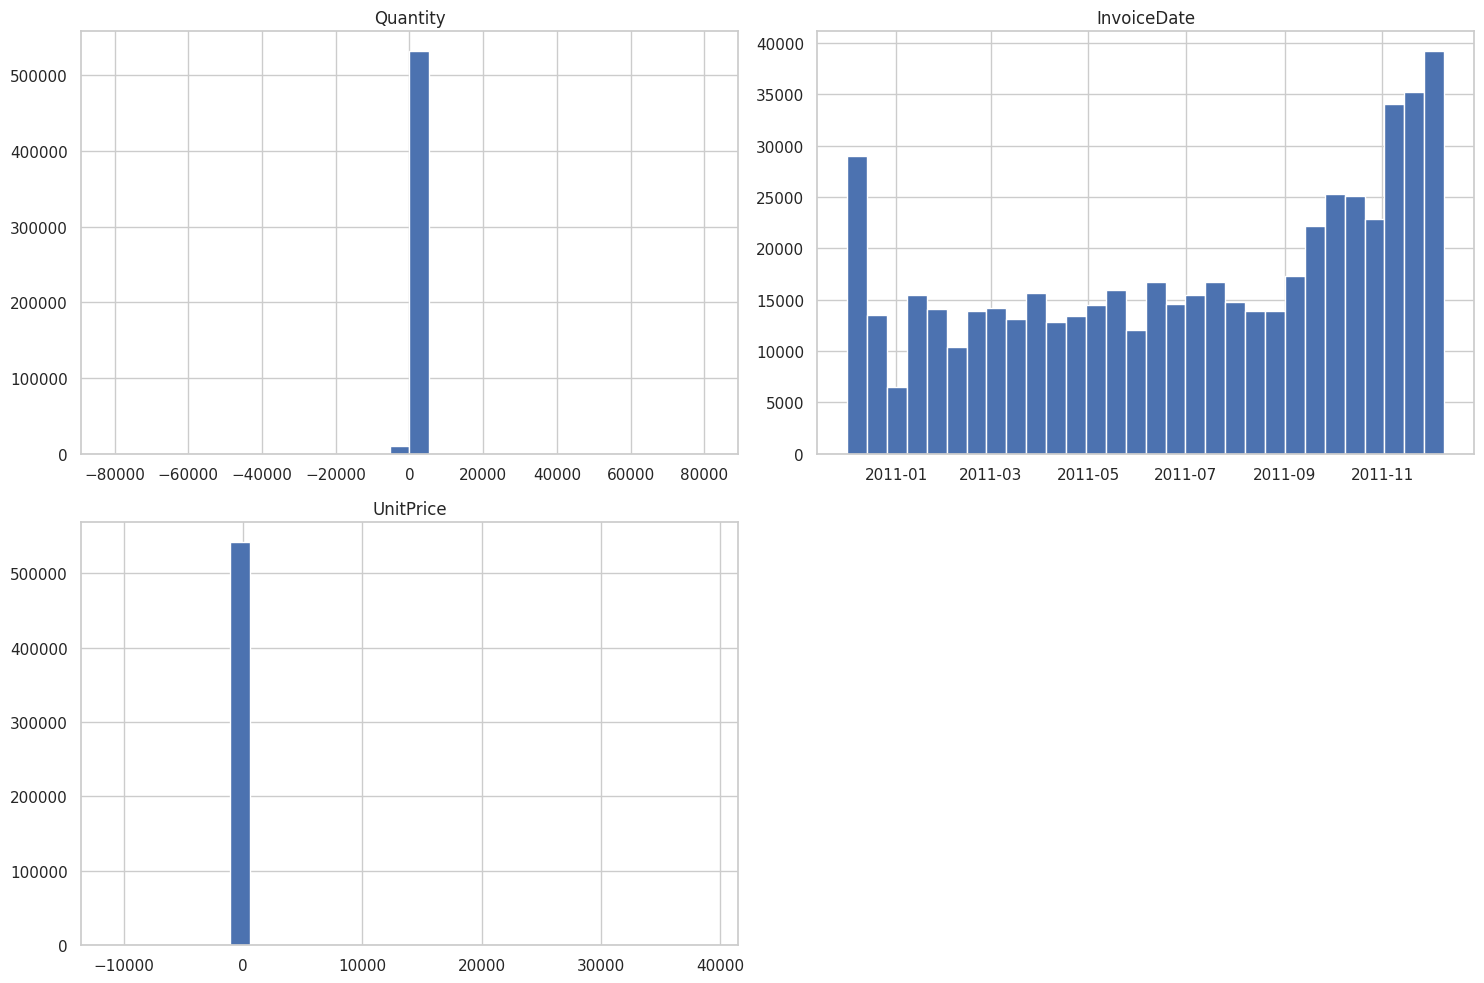

In [ ]:
# Histogramas para variáveis numéricas
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

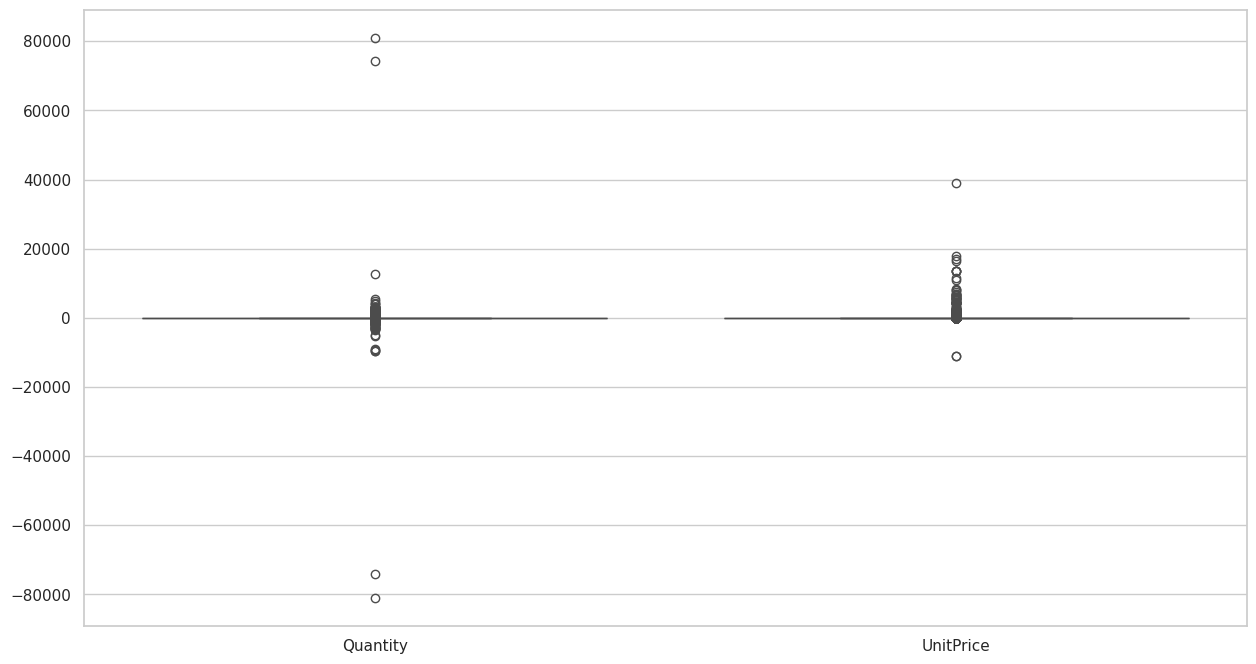

In [ ]:
# Boxplot para identificar outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=360)
plt.show()

In [ ]:
# Verificando dados nulos
null_values = df.isnull().sum()
print("Valores nulos por coluna:\n", null_values)

Valores nulos por coluna:
 InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [ ]:
# Verificando dados duplicados
duplicates = df.duplicated().sum()
print("Número de registros duplicados:", duplicates)

Número de registros duplicados: 5268


In [ ]:
# Calcular IQR para Quantity
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

In [ ]:
# Identificar outliers em Quantity
outliers_quantity = df[(df['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) |
                        (df['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity))]

In [ ]:
# Calcular IQR para UnitPrice
Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

In [ ]:
# Identificar outliers em UnitPrice
outliers_unitprice = df[(df['UnitPrice'] < (Q1_unitprice - 1.5 * IQR_unitprice)) |
                         (df['UnitPrice'] > (Q3_unitprice + 1.5 * IQR_unitprice))]

In [ ]:
# Exibir resultados
print("Outliers em Quantity:\n", outliers_quantity)
print("Outliers em UnitPrice:\n", outliers_unitprice)

Outliers em Quantity:
        InvoiceNo StockCode                         Description  Quantity  \
9         536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
26        536370     22728           ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727           ALARM CLOCK BAKELIKE RED         24   
30        536370     21883                    STARS GIFT TAPE         24   
31        536370     10002         INFLATABLE POLITICAL GLOBE         48   
...          ...       ...                                 ...       ...   
541876    581585     84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541882    581585     21916     SET 12 RETRO WHITE CHALK STICKS        24   
541883    581585     84692         BOX OF 24 COCKTAIL PARASOLS        25   
541891    581586     23275    SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217       RED RETROSPOT ROUND CAKE TINS        24   

               InvoiceDate  UnitPrice CustomerID         Country

**Resultados da Descrição Estatística**

A descrição estatística das variáveis numéricas da base de dados revelou insights importantes. A média da coluna Quantity foi de aproximadamente 9,55, com um desvio padrão elevado de 218,08, indicando que, em média, os clientes compram cerca de 9,55 itens por transação, embora haja uma ampla variação nos volumes de compra, refletida pelos valores mínimo e máximo de -80.995 e 80.995, respectivamente. O preço unitário (UnitPrice) apresentou uma média de 4,61 e um desvio padrão de 96,76, sugerindo uma diversidade significativa nos preços dos produtos. Os valores extremos indicam a presença de compras de grande volume ou de produtos com preços fora da faixa usual, com preços unitários variando de -11.062,06 a 38.970.



**Distribuições**

As distribuições observadas para as variáveis Quantity e UnitPrice foram analisadas através de histogramas e boxplots. O histograma da Quantity revela uma distribuição assimétrica, com uma concentração significativa de transações em torno de valores baixos, enquanto há um grande número de outliers em ambas as extremidades, com valores extremos que atingem até 80.995. A presença de valores negativos indica possíveis erros de entrada ou devoluções. Por outro lado, a distribuição do UnitPrice também mostra uma concentração em torno de preços baixos, com outliers positivos que alcançam 38.970, sugerindo a existência de produtos com preços muito acima da média. Os boxplots corroboram a presença de outliers em ambas as variáveis, evidenciando a necessidade de um tratamento cuidadoso desses valores, pois podem distorcer as análises subsequentes e a formação de clusters.

**Dados Nulos e Duplicados**

A análise dos dados revelou que a coluna Description contém 1.454 valores nulos, o que pode impactar a interpretação das compras, já que a falta de descrições pode dificultar a análise dos produtos vendidos. As demais colunas não apresentam valores nulos, indicando uma boa qualidade dos dados nesse aspecto. Além disso, a presença de 5.268 registros duplicados na base de dados é uma preocupação, pois esses duplicados podem distorcer a análise, levando a resultados enganosos sobre o volume total de vendas e a frequência de compras. Recomenda-se tratar esses registros duplicados antes de prosseguir com análises mais profundas, como a clusterização.

**Outliers e Inconsistências**

A análise de outliers revelou que, na coluna Quantity, foram identificados 58.619 registros que apresentam valores atípicos, incluindo quantidades como 32 e 24, que são significativamente maiores do que a média, sugerindo compras incomuns ou em grandes volumes. Isso pode indicar a presença de promoções ou erros de entrada de dados. Para a coluna UnitPrice, foram identificados 39.627 registros com outliers, incluindo preços como 27,50 e 18,00, que estão bem acima da faixa normal de preços unitários.

# **Etapa 03: Selecione um algoritmo de clusterização**

In [ ]:
# Importando a base de dados das métricas RFM
rfm = pd.read_csv('/content/final_rfm_metrics.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Padronizando as métricas RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

**Algoritimo de clausterirzação escolhido: K-Means**

Justificativa: A escolha do algoritmo K-Means para a clusterização foi baseada na sua eficácia em lidar com grandes conjuntos de dados, sua simplicidade na implementação e sua capacidade de identificar clusters esféricos de forma rápida, permitindo uma segmentação clara dos clientes em grupos distintos com base em suas características de compra.

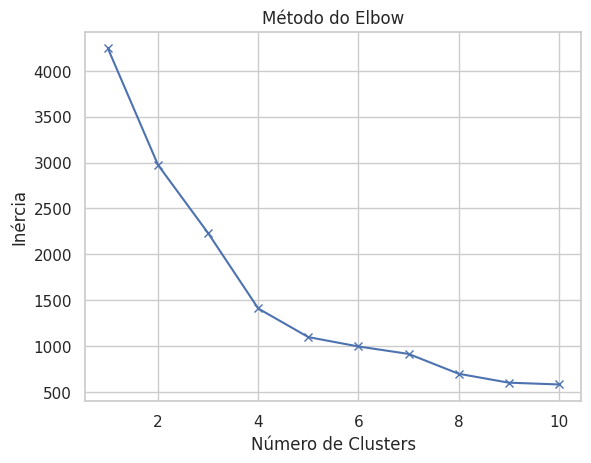

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Método do Elbow
inertia = []
K = range(1, 11)  # Testar de 1 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Elbow')
plt.show()

In [ ]:
# Implementação do K-Means com a quantidade ideal de clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

# Adicionando os clusters ao DataFrame original
rfm['Cluster'] = clusters

# **Etapa 04: Análise dos clusters obtidos**

In [ ]:
# Para garantir que os gráficos apareçam no notebook
%matplotlib inline

In [ ]:
# Calcular médias por cluster
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # Contar o número de clientes em cada cluster
}).reset_index()

In [ ]:
# Renomear colunas para clareza
cluster_analysis.columns = ['Cluster', 'Média Recência', 'Média Frequência', 'Média Gasto', 'Número de Clientes']

In [ ]:
print(cluster_analysis)

   Cluster  Média Recência  Média Frequência  Média Gasto  Número de Clientes
0        0       62.476861          1.241449   299.595556                 497
1        1        8.983471          5.561983   411.885316                 121
2        2       16.625000         23.875000   481.243980                   8
3        3       21.636364          3.181818  5350.458519                  11
4        4       17.836761          1.550129   369.540932                 778


In [ ]:
# Plote gráficos para auxiliar na análise
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

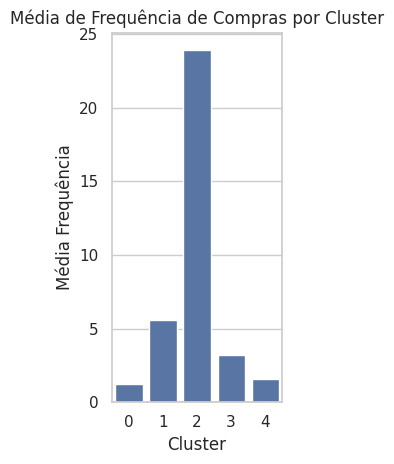

In [ ]:
# Gráfico da média de frequência por cluster
plt.subplot(1, 3, 1)
sns.barplot(data=cluster_analysis, x='Cluster', y='Média Frequência')
plt.title('Média de Frequência de Compras por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média Frequência')
plt.tight_layout()
plt.show()

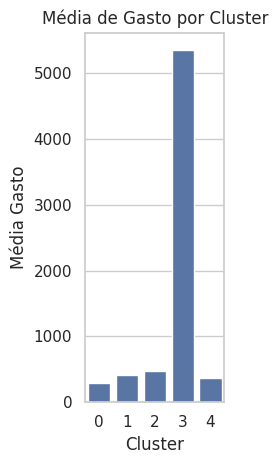

In [ ]:
# Gráfico da média de gasto por cluster
plt.subplot(1, 3, 2)
sns.barplot(data=cluster_analysis, x='Cluster', y='Média Gasto')
plt.title('Média de Gasto por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média Gasto')
plt.tight_layout()
plt.show()

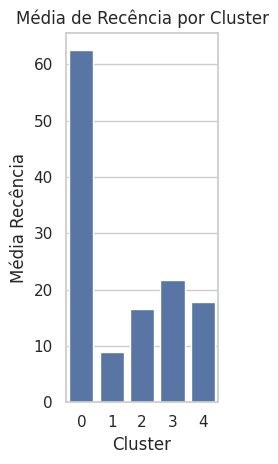

In [ ]:
# Gráfico da média de recência por cluster
plt.subplot(1, 3, 3)
sns.barplot(data=cluster_analysis, x='Cluster', y='Média Recência')
plt.title('Média de Recência por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média Recência')
plt.tight_layout()
plt.show()

In [ ]:
print(df['CustomerID'].dtype)  # Tipo de dados no DataFrame df
print(rfm['CustomerID'].dtype)  # Tipo de dados no DataFrame rfm

object
int64


In [ ]:
# Verificando valores únicos para identificar o problema
print(df['CustomerID'].unique())

# Tratar valores nulos se existirem
df['CustomerID'] = df['CustomerID'].fillna(0)  # Exemplo de preenchimento com 0

['17850.0' '13047.0' '12583.0' ... '13298.0' '14569.0' '12713.0']


In [ ]:
# Converter 'CustomerID' para float e depois para int
df['CustomerID'] = df['CustomerID'].astype(float)

# Verificando os tipos de dados após a conversão
print(df['CustomerID'].dtype)

float64


In [ ]:
print(df['CustomerID'].dtype)  # Tipo de dados no DataFrame df
print(rfm['CustomerID'].dtype)  # Tipo de dados no DataFrame rfm

float64
int64


**Clientes que compram os mesmos produtos**

In [ ]:
#Mesclando o DataFrame de RFM com as transações para incluir as descrições dos produtos
merged_data = df.merge(rfm[['CustomerID', 'Cluster']], on='CustomerID')

# Agrupando dados pelo Cluster e pela descrição do produto
product_frequency = merged_data.groupby(['Cluster', 'Description']).size().reset_index(name='Frequency')

# Tabela de produtos mais populares em cada cluster
popular_products = product_frequency.sort_values(by=['Cluster', 'Frequency'], ascending=[True, False])

# Exibir os 10 produtos mais populares por cluster
top_products_per_cluster = popular_products.groupby('Cluster').head(10)
print(top_products_per_cluster)


       Cluster                          Description  Frequency
3089         0   WHITE HANGING HEART T-LIGHT HOLDER        256
2285         0             REGENCY CAKESTAND 3 TIER        204
183          0        ASSORTED COLOUR BIRD ORNAMENT        192
1460         0              JUMBO BAG RED RETROSPOT        185
2330         0         REX CASH+CARRY JUMBO SHOPPER        177
1605         0              LUNCH BAG RED RETROSPOT        155
1919         0      PAPER CHAIN KIT 50'S CHRISTMAS         143
1879         0      PACK OF 72 RETROSPOT CAKE CASES        135
1597         0              LUNCH BAG  BLACK SKULL.        133
1609         0               LUNCH BAG SUKI DESIGN         129
5334         1             REGENCY CAKESTAND 3 TIER        322
4568         1              JUMBO BAG RED RETROSPOT        274
6081         1   WHITE HANGING HEART T-LIGHT HOLDER        269
5018         1                        PARTY BUNTING        220
5520         1    SET OF 3 CAKE TINS PANTRY DESIGN     

**Clientes com a mesma frequência de compras**

In [ ]:
# Calcular a frequência média de compras por cluster
frequency_analysis = rfm.groupby('Cluster').agg({
    'Frequency': 'mean',
    'CustomerID': 'count'  # Contar o número de clientes em cada cluster
}).reset_index()

# Renomear colunas para clareza
frequency_analysis.columns = ['Cluster', 'Média Frequência', 'Número de Clientes']

# Exibir a análise de frequência
print(frequency_analysis)

   Cluster  Média Frequência  Número de Clientes
0        0          1.241449                 497
1        1          5.561983                 121
2        2         23.875000                   8
3        3          3.181818                  11
4        4          1.550129                 778


**Clientes que gastam mais em suas compras**

In [ ]:
# Calcular a média de gasto por cluster
monetary_analysis = rfm.groupby('Cluster').agg({
    'Monetary': 'mean',
    'CustomerID': 'count'  # Contar o número de clientes em cada cluster
}).reset_index()

# Renomear colunas para clareza
monetary_analysis.columns = ['Cluster', 'Média Gasto', 'Número de Clientes']

# Exibir a análise de gasto
print(monetary_analysis)

   Cluster  Média Gasto  Número de Clientes
0        0   299.595556                 497
1        1   411.885316                 121
2        2   481.243980                   8
3        3  5350.458519                  11
4        4   369.540932                 778


# **Etapa 05: Interpretação dos resultados obtidos**

# **a. Descrição do Perfil de Compras dos Clientes de Cada Cluster**

**Cluster 0:**

Produtos Populares: Itens como o "WHITE HANGING HEART T-LIGHT HOLDER" e "REGENCY CAKESTAND 3 TIER" são os mais comprados.

Frequência Média: Aproximadamente 1,24 compras por cliente.

Gasto Médio: Em média, os clientes gastam 299,60 por transação.

Número de Clientes: 497 clientes.

Perfil: Clientes com compras esporádicas de itens decorativos e de uso diário.

**Cluster 1:**

Produtos Populares: "REGENCY CAKESTAND 3 TIER" e "JUMBO BAG RED RETROSPOT" são os mais populares.

Frequência Média: Aproximadamente 5,56 compras por cliente.

Gasto Médio: Média de 411,89 por transação.

Número de Clientes: 121 clientes.

Perfil: Clientes um pouco mais engajados, com uma frequência de compras mais alta, sugerindo interesse por itens de festa e decoração.

**Cluster 2:**

Produtos Populares: Produtos como "REGENCY CAKESTAND 3 TIER" e "GUMBALL COAT RACK".

Frequência Média: 23,88 compras por cliente (muito alta).

Gasto Médio: Média de 481,24 por transação.

Número de Clientes: Apenas 8 clientes.

Perfil: Clientes altamente engajados que compram frequentemente, possivelmente revendedores ou entusiastas de produtos.

**Cluster 3:**

Produtos Populares: "WHITE HANGING HEART T-LIGHT HOLDER" e "REGENCY CAKESTAND 3 TIER".

Frequência Média: Aproximadamente 3,18 compras por cliente.

Gasto Médio: Em média, 5.350,46 (o que é significativamente mais alto).

Número de Clientes: 11 clientes.

Perfil: Clientes que fazem compras substanciais e são mais seletivos nas suas compras.

**Cluster 4:**

Produtos Populares: "WHITE HANGING HEART T-LIGHT HOLDER" e "JUMBO BAG RED RETROSPOT".

Frequência Média: Aproximadamente 1,55 compras por cliente.

Gasto Médio: Média de 369,54 por transação.

Número de Clientes: 778 clientes.

Perfil: Clientes com comportamento de compra mais padrão, mostrando interesse por produtos variados, mas sem uma frequência muito alta.

# **b. Justificativa da Análise para Segmentação e Personalização**


**Segmentação:** Identificar diferentes grupos de clientes com base em suas características de compra. Isso permite que a empresa entenda melhor os hábitos de compra de cada segmento.

**Personalização de Campanhas:** Compreender as preferências dos clientes em cada cluster pode ajudar na criação de campanhas de marketing personalizadas. Por exemplo, o Cluster 2 pode ser alvo de campanhas focadas em produtos de alta rotatividade e promoções, enquanto o Cluster 3 pode receber ofertas exclusivas para produtos de alto valor.

**Alocação Eficiente de Recursos:** A segmentação permite que a empresa direcione seus esforços de marketing e promoções de maneira mais eficiente, investindo mais em segmentos que trazem maior retorno.

# **c. Sugestões de Ações Possíveis**

**1) Campanhas Personalizadas:**

Para o Cluster 2, desenvolver campanhas de fidelidade ou promoções para aumentar a retenção, dado seu alto engajamento e gasto.

Para o Cluster 3, oferecer descontos ou benefícios exclusivos, dada a sua alta média de gasto, para encorajar mais compras.

**2) Promoções Temáticas:**

Criar promoções sazonais focadas em itens populares, como decorações para festas ou itens para ocasiões especiais, com base nos produtos mais comprados.

**3) Cross-Selling e Upselling:**

Oferecer produtos complementares ou versões premium dos produtos que são populares em cada cluster, incentivando clientes a aumentar o valor de suas compras.

**4) Feedback e Engajamento:**

Para clusters com baixa frequência de compras, realizar pesquisas para entender os motivos por trás da infrequência e ajustar as estratégias de marketing.

**5) Análise Contínua:**

Continuar monitorando o comportamento de compra e a eficácia das campanhas para ajustar a segmentação e personalização ao longo do tempo.